Scientific Computing Coursework EMAT30008

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from ExampleFunctions import *
from ODEsolver import error_difference, solve_odes

Ordinary Differential Equation solver
-------------------------------------
The purpose of this software is to iteratively solve an ordinary differential equation (ODE) or system of ODEs using either the Euler method or the fourth order Runge-Kutta (RK4) method. The code uses three functions to achieve this, `euler_step`, `RK4_step` and `solve_odes`. The `solve_odes` function uses a for loop to iterate through time steps where the solution to the ODE is approximated with increasing accuracy by `RK4_step` and `Euler_step`. `Solve_odes` allows the user to input any combination of starting values, step size, method and nescessary constants to solve any ODE system. The graphs below display the error of the Euler and RK4 methods with increasing timesteps when applied to the ODE x. = x (eulers constant), using np.exp to generate the true values and calculate the error. The Euler and RK4 methods have a similar error value when the timestep is 0.01 and 1, respectively. The RK4 error is persistently several orders of magnitude below the Euler error. This is expected as the RK4 method is a fourth order method which results in smaller truncation errors. For this reason, the `solve_odes` function uses the RK4 method as default. The use of **kwargs is nescessary to input any number of additional arguments required to solve the ODE system. To test for truncation and global errors, it would be worthwhile to increase the range of solutions and use a larger amount of evaluation points. Also, it would be useful to implement some other one step numerical integrators which may be better suited to different functions. 

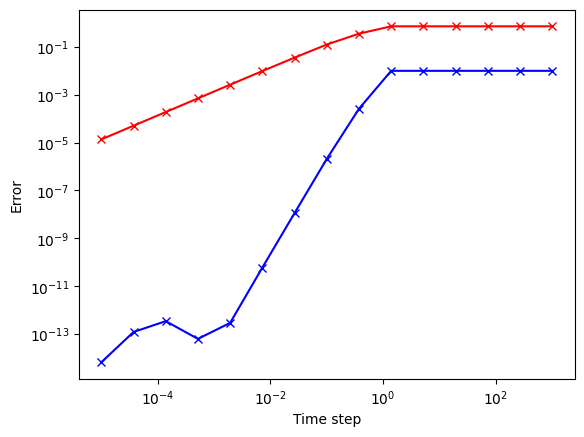

In [24]:
pars = 1
error_difference(euler_number, x0=1, t0=0, t1=1, true_solution = true_euler_number, pars = pars)

`Perf_counter()` can be used to calculate the time difference between these two methods. As expected, the RK4 method takes far longer than the Euler method. 

In [27]:
import time

start_timeEuler = time.perf_counter()
ansEuler, tEuler = solve_odes(euler_number, x0=1, t0=0, t1=100, dt_max=0.01, solver = 'euler')
end_timeEuler = time.perf_counter()

start_timeRK4 = time.perf_counter()
ansRK4, tRK4 = solve_odes(euler_number, x0=1, t0=0, t1=100, dt_max=0.01, solver = 'rk4')
end_timeRK4 = time.perf_counter()

print('Time taken for the Euler method:', abs(end_timeEuler-start_timeEuler)) 
print('Time taken for the RK4 method:', abs(end_timeRK4-start_timeRK4))

Time taken for the Euler method: 0.058224599924869835
Time taken for the RK4 method: 0.09758549998514354


Using a large value of dt_max to solve d_xx = -x produces a solution that degrades in accuracy over time.

In [28]:
from ExampleFunctions import func2
from ODEsolver import plotter

sol, t = solve_odes(func2, x0=[0.5,0.5], t0=0, t1=100, dt_max=0.01)
sol1, t1 = solve_odes(func2, x0=[0.5,0.5], t0=0, t1=100, dt_max=1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plotter(t, sol, 'Time', 'Solution Value', 'dt_max = 0.01', ax1)
plotter(t1, sol1, 'Time', 'Solution Value', 'dt_max = 1', ax2)

plt.tight_layout()
plt.show()

ImportError: cannot import name 'plotter' from 'ODEsolver' (c:\Users\smith\OneDrive\Documents\Eng Maths Yr 3\Scientific Computing\EMAT30008\ODEsolver.py)

Numerical Shooting
------------------
The numerical shooting software, solves boundary value ODE problems, using my numerical integrator solve_odes and the root finder fsolve. The code begins with a phase portrait plotting function which is useful to visualise the phase of a function. My iso_orbit function uses the signal library from scipy to determine if a limit cycle exists for the function, what its starting conditions are and the time period of the cycle. This function is vital for ensuring the shooting function works as it provides me with solutions to test against, and allowed me to provide the shooting function with suitable initial guesses. The shooting function solves a boundary value problem for an ODE system using the shooting method. It takes two arguments: f is a function defining the ODE system, and phase_cond is a function defining the boundary conditions to be satisfied. It returns a function G that takes an initial guess u0T for the solution and a dictionary of parameters, and returns the difference between the actual and guessed boundary conditions.

The G function defines another function F that solves an IVP with the shooting method using the guessed initial condition and final time value. It returns the final solution, which is compared to the actual boundary condition in the G function. The G function computes the difference between the guessed initial condition and the solution obtained by F, and appends the difference between the actual boundary condition and the guessed boundary condition computed by phase_cond. The resulting numpy array represents the residuals between the boundary conditions and the solution obtained by the shooting method.

Improvements:

Add type annotations.
Allow for the specification of shooting parameters.
Add error checking and exception handling.
Limitations:

Assumes a well-posed problem with a numerically solvable ODE system.
No options for selecting or adjusting the shooting parameter.
The solve_odes function called by F is not defined in the code snippet provided.


The find shooting orbit is useful for the user as it is more apparent how to use it. Find shooting orbit completes the root finding step of shooting useing fsolve. In future I would use other root finding methods other than fsovle. To plot the long term behaviour of the predator prey function for different parameters, I used the code:

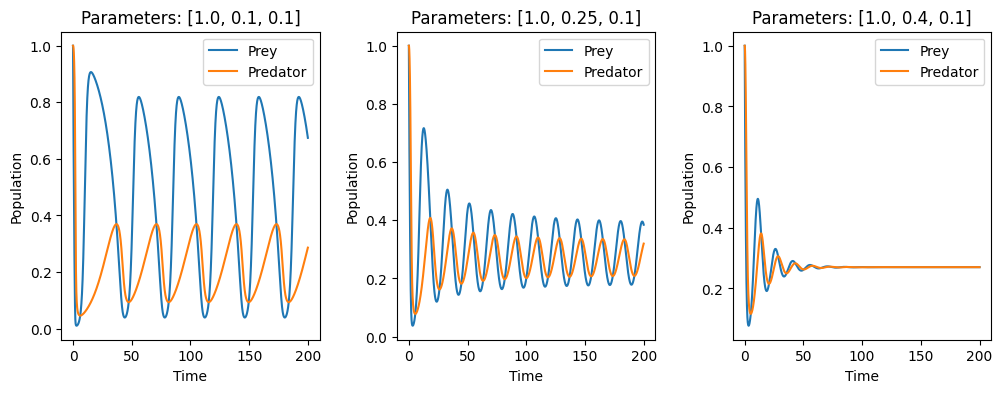

In [5]:
from ODEsolver import plot_different_parameters
from ExampleFunctions import predator_prey

params = [[1.0, 0.1, 0.1], [1.0, 0.25, 0.1], [1.0, 0.4, 0.1]]
plot_different_parameters(predator_prey, x0=[1,1], t0=0, t1=200, dt_max=0.01, params=params)

In the predator-prey function, when b is less than 0.25, the populations oscillate periodically for infinite time, whereas when b is greater than 0.25, the populations reach a stable equilibrium. 

Though my code is generalised for use with any phase condition, I typically use the phase condition of dx/dt(0) = 0 because there is at least one point along the limit cycle where d𝑑𝑥
𝑑𝑡
(0) is true. The function returns the value of
𝑑𝑥
𝑑𝑡
at time = 0. To implement iso_orbit, I run the code and get the values...

In [6]:
from NumericalShooting import iso_orbit

pars = [1.0, 0.2, 0.1]
orbit = iso_orbit(predator_prey, x0=[1,1], t0=0, t1=500, dt_max=0.01, pars=[1.0,0.2,0.1])
print('The true values of the predator prey orbit:', orbit)

The true values of the predator prey orbit: [0.5779027054793053, 0.2860464315137474, 20.810000000000002]


Using the values from iso_orbit as a reasonable approximate guess and using the phase condition from earlier, I can implement numerical shooting using

In [7]:
from NumericalShooting import find_shoot_orbit
from ExampleFunctions import pred_prey_pc

u0T = [0.6, 0.3, 20]
pars = [1.0, 0.2, 0.1]
shooting_orbit = find_shoot_orbit(predator_prey, pred_prey_pc, u0T, pars)
print('The shooting values of the predator prey orbit: ', shooting_orbit)

The shooting values of the predator prey orbit:  [ 0.57787148  0.28614888 20.81686658]


To further test the limtis of my code, I decided to test the Hopf bifurcation normal form ODE against its analytical solution for when sigma = -1, a supercritical Hopf bifurcation. 

In [8]:
from ExampleFunctions import hopf, hopf_pc

pars = [0.3, -1]
orbit = iso_orbit(hopf, [1,1], 0, 200, 0.01, pars=pars)
print('The true values of the hopf orbit:', orbit)

# Using the true values from before to provide an initial guess
u0T = [0.6, 0.001, 6]
shooting_orbit = find_shoot_orbit(hopf, hopf_pc, u0T, pars)
print('The shooting values of the hopf orbit: ', shooting_orbit)

The true values of the hopf orbit: [0.5477207294492535, 0.0014552606415028898, 6.290000000000003]
The shooting values of the hopf orbit:  [ 5.47722557e-01 -1.14849884e-12  6.28318531e+00]


Numerical Continuation
----------------------
Numerical continuation is used to investigate how the solution to a system of ODEs depend 
on the varying values of a parameter. Numerical continuation can either be used to find 
roots of polynomials, initial conditions in ODEs, or steady states in PDEs. This code defines a function natural_continuation that performs a natural continuation analysis on a system of ordinary differential equations (ODEs) given by a function f as a function of a specified parameter. The function first sets up a list of parameter values between min_par and max_par with a total of no_steps values. Then, depending on the discretisation option (either 'shooting' or 'fsolve'), it either uses a shooting method or a root-finding method to compute the solution of the ODEs at each parameter value.

If the phase_cond option is specified as anything other than 'None', the shooting method is used and the find_shoot_orbit function is called to solve the ODEs with the specified phase condition. Otherwise, the root-finding method fsolve is used with an initial guess for the solution u0, and the solution at each parameter value is used as the initial guess for the solution at the next parameter value to ensure convergence.

The function returns a tuple containing two arrays: the first contains the solutions of the ODE system for each parameter value, and the second contains the corresponding parameter values.

One potential improvement could be to allow for additional input arguments to be passed to the fsolve function, as these could be useful in some cases. Additionally, the function could be made more flexible by allowing the user to specify which root-finding method to use instead of hard-coding fsolve. I would also like to have other discretistaiton methods.

One potential drawback is that the natural_continuation function assumes that the system of ODEs given by f is well-behaved and does not handle cases where the ODEs are ill-behaved, such as when there are singularities or discontinuities in the solution. The algebraic cubic equation does not require shooting.

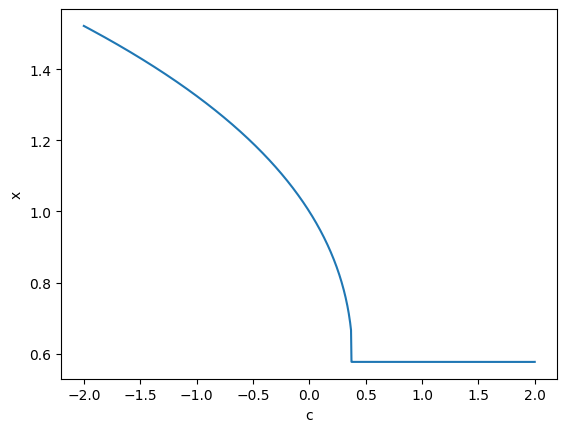

In [17]:
from NumericalContinuation import natural_continuation

cubic_results, pars = natural_continuation(cubic, 0, -2, 2, 1000)
plt.plot(-pars, -cubic_results)
plt.xlabel('c')
plt.ylabel('x')
plt.show()

I also use the hopf bifurcation to test my code. I use norm to get the right sol as there is a bifuraction. In future I want to extend this code as I am clearly gettinga saddle bifurcation but the results are a little messy, I think maybe I will add additional solution variables.

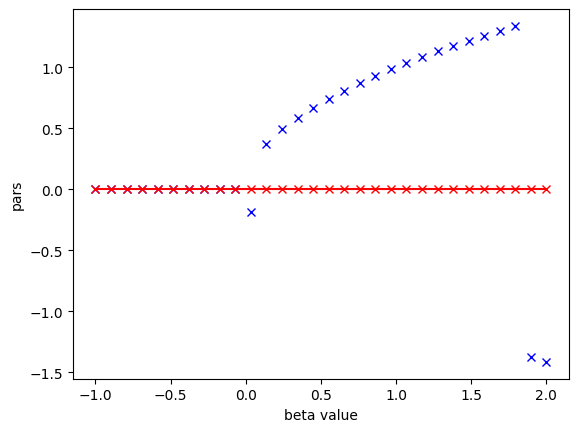

In [21]:
from ExampleFunctions import hopf_bif, hopf_bif_pc

results, pars = natural_continuation(hopf_bif, [1.2, 1.0, 4], -1, 2, 30, hopf_bif_pc)
plt.plot(pars, results[:,0], 'bx')
plt.plot(pars,results[:,1],'rx-')
plt.xlabel('beta value')
plt.ylabel('pars')
plt.show()

Boundary Value Problem Solver
----------------------------
This function implements a boundary value problem (BVP) solver using a finite difference grid. First, the matrix_build function creates a tridiagonal matrix. I also have three different types of boundary conditions 'dirichlet', 'neumann' and 'robin'. These boundary conditions can be used interchangably and are called inside of the BVP_solver and applied to the matrix built by matrix_build. I also have an optional source function with a variety of inputs. The source function can be an integer, dependant on x, or dependant on the solutions. The finite grid is constructed using the finite_grid function, this function returns a variety of useful values used for solving the linear algebra equation. I then created the Matrix_solver function to solve the system of matrix equations. Due to the fact that my source function can depend on the solution, I created the iterative_solver function such that the solution can be passed to the source term. The BVP_solver then uses these functions listed before to solve a boundary value partial differential equation. Extend for mixed BCs.

Below I demonstrate the capability of my code by solving a variety of equations.

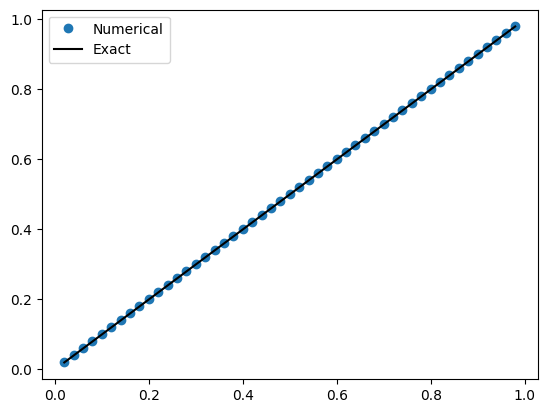

In [24]:
from BVPsolver import BVP_solver

x_ans, x_int = BVP_solver(N=50, a=0, b=1, gamma1=0, gamma2=1, D=1, source=False)
u_true = true_sol(x_int, a=0, b=1, alpha=0, beta=1, D=1)
plt.plot(x_int, x_ans, 'o', label="Numerical")
plt.plot(x_int, u_true, 'k', label='Exact')
plt.legend()
plt.show()

Solving a PDE with a neumann boundary condition.

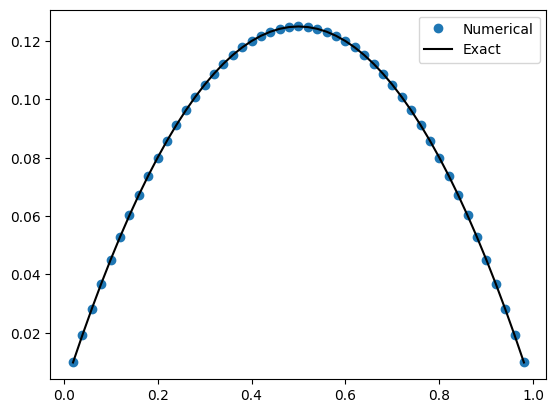

In [27]:
x_ans2, x_int2 = BVP_solver(N=50, a=0, b=1, gamma1=0, gamma2=0, D=1, integer=1, source=True, boundary="neumann", x_dependant=False)
u_ans2 = true_ans_part2(x_int2, a=0, b=1, alpha=0, beta=0, D=1, integer=1)
plt.plot(x_int2, x_ans2, 'o', label="Numerical")
plt.plot(x_int2, u_ans2, 'k', label='Exact')
plt.legend()
plt.show()

Solving the Bratu equation with a soruce term dependant on both x and the solution. 

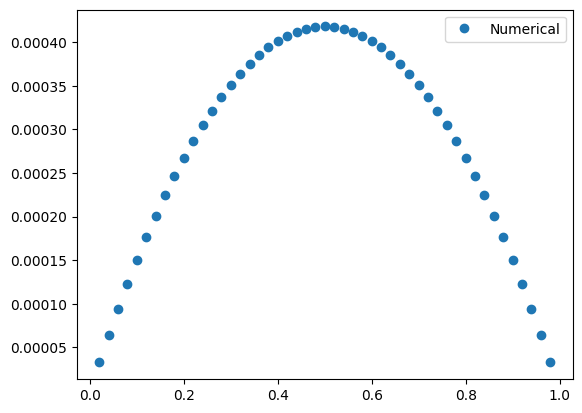

In [41]:
# Bratu Equation
x_ansbratu, x_intbratu = BVP_solver(N=50, a=0, b=1, gamma1=0, gamma2=0, D=3, integer=0.1, source=True, boundary="dirichlet", x_dependant=False, u_dependant=True, tol=1e-6, max_iter=100)
plt.plot(x_intbratu, x_ansbratu, 'o', label="Numerical")
plt.legend()
plt.show()

Partial Differential Equations
------------------------------

The first function, `explicit_euler`, solves a linear diffusion equation using the explicit Euler method. It takes in various parameters such as the diffusion coefficient (D), boundary conditions (gamma1, gamma2), domain limits (a, b), time and space step sizes (dt, dx), and initial conditions (x_int). It returns a matrix of solutions U that represents the evolution of the system over time.

One good thing about the explicit Euler method is that it is relatively simple to implement and understand. However, it can be inaccurate and unstable for certain types of problems, especially when the time step is large. One improvement could be to use a more advanced numerical method, such as the implicit Euler or Crank-Nicolson methods, which are more stable and accurate.

The second function, `heat_equation_RK4`, also solves a linear diffusion equation, but uses the Runge-Kutta 4 method to obtain a numerical solution. The parameters and initial conditions are similar to `explicit_euler`, except that the function also takes in an array of time values (t) instead of the number of time steps.

One good thing about the RK4 method is that it is a higher-order method and can provide more accurate solutions than the explicit Euler method. However, it can also be more computationally expensive. One improvement could be to use a more efficient numerical method, such as the Backward Differentiation Formula (BDF) method, which can handle stiff differential equations more efficiently.

Animate solution simply animates the solution matrices at different steps in time. Time grid simply provides some useful infomation back used for other PDE stuff. 

The first function, implicit_euler, also solves a linear diffusion equation, but uses the implicit Euler method. It takes in various parameters such as the diffusion coefficient (D), boundary conditions (gamma1, gamma2), domain limits (a, b), time and space step sizes (dt, dx), and initial conditions (IC). It returns a matrix of solutions U that represents the evolution of the system over time.

One good thing about the implicit Euler method is that it is unconditionally stable, meaning that it can handle large time steps without becoming unstable. However, it can be more computationally expensive than the explicit Euler method because it requires the solution of a linear system at each time step. One improvement could be to use a more efficient numerical method, such as the Crank-Nicolson method, which can provide higher accuracy with a similar level of stability.

The second function, crank, also solves a linear diffusion equation, but uses the Crank-Nicolson method. The parameters and initial conditions are similar to implicit_euler, except that the function uses a modified version of the matrix equation to obtain a numerical solution.

One good thing about the Crank-Nicolson method is that it is more accurate than both the explicit and implicit Euler methods, and is also unconditionally stable. However, it can be more computationally expensive due to the need to solve a larger linear system at each time step. One improvement could be to use a more efficient method, such as the Alternating Direction Implicit (ADI) method, which can provide similar accuracy with a reduced computational cost.

I have a variety of examples:

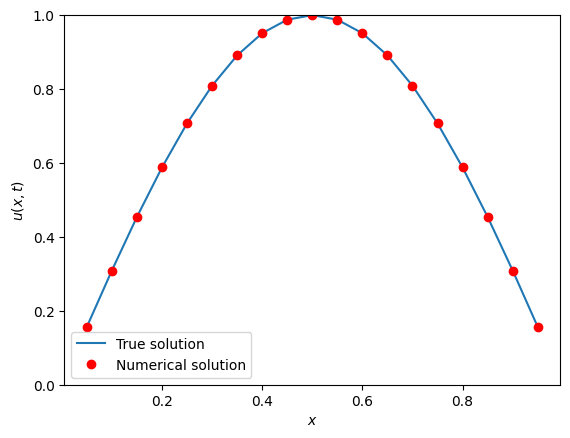

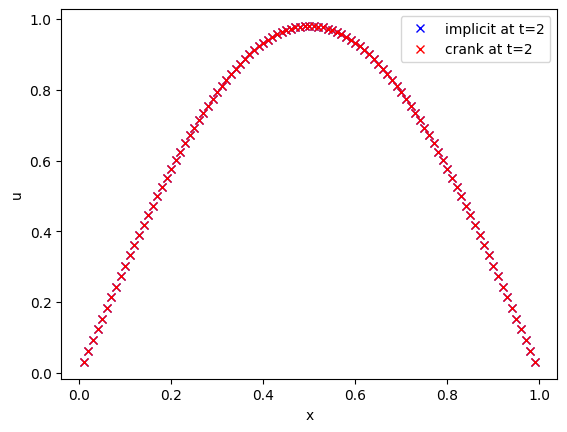

In [12]:
from PDEsolver import time_grid, true_sol_func, explicit_euler, heat_equation_RK4, implicit_euler, crank, animate_solution
from ExampleFunctions import linear_diffusion_IC1, linear_diffusion_IC2

N=20
a=0
b=1
gamma1=0.0
gamma2=0.0
D = 1

dt, dx, t, N_time, x_int = time_grid(N, a, b, D)
U_explicit = explicit_euler(N, D, gamma1, gamma2, a, b, dt, dx, t, N_time, x_int)
U_RK4 = heat_equation_RK4(N, D, gamma1, gamma2, a, b, dt, dx, t, x_int)
u_true = true_sol_func(N, D, a, b, t, N_time, x_int)
animate_solution(U_explicit, u_true, x_int, N_time)

#Part 2
N=100
D=0.1
dt, dx, t, N_time, x_int = time_grid(N, a, b, D)
U_implicit = implicit_euler(N, gamma1, gamma2, D, N_time, x_int, 0.1, dx, linear_diffusion_IC2)
    
U_crank = crank(N, gamma1, gamma2, D, N_time, x_int, 0.1, dx, linear_diffusion_IC2)

plt.plot(x_int, U_implicit[2,:], 'bx', label='implicit at t=2')
plt.plot(x_int, U_crank[2,:], 'rx', label='crank at t=2')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.show()    

To find the answers to the problem in question, I interpolated the solutions to find an answer at each point, these were my results. It is strange the crank solutions were further from the answer however when investigating larger time steps, the crank solution remained much more accurate whilst the implicit euler method quickly gained a large error value to the true solution. 

In [13]:
import scipy.interpolate

print('true sol = ', np.exp(-0.2*np.pi**2))
y_interp1 = scipy.interpolate.interp1d(U_implicit[2,:], x_int, kind='linear')
print('implicit euler = ', y_interp1(0.5))

y_interp2 = scipy.interpolate.interp1d(U_crank[2,:], x_int, kind='linear')
print('crank = ', y_interp2(0.5))

true sol =  0.13891113314280026
implicit euler =  0.19125964879327972
crank =  0.192458975137013


Reflective learning log
-----------------------

Description ofkey software design
The software design comprises multiple functions that are called with other functions as arguments. For instance, the "solve_ode" function takes in the "solver" argument which the user can specify as Euler or RK4. The primary function is "solve_to," which computes the calculations and ensures that "h" does not overshoot. To increase efficiency, I created a separate function to obtain the default boundary conditions, phase conditions, and limit cycles, allowing the function to be called from anywhere in the script.

Numpy arrays were utilized throughout the ODE solving process to store the output of the functions. Arrays are efficient at storing large amounts of data compactly and have more straightforward operations such as appending and numerical operations compared to lists. Moreover, numpy arrays can handle ODEs with higher dimensions than 1D in a system of ODEs.

Control flow statements, including "if," "elif," "else," and "for" statements, were heavily used in the code. These statements allow for decision-making operations where the body of code is only executed if the condition given in the "if" statement is true. For loops are appropriate when a body of code needs to be iterated a fixed number of times, which is frequently the case when calculating ODEs.

A significant design decision was to create a custom ODE solver instead of using pre-existing numerical integrators such as "solve_ivp" and "odeint" from scipy. This choice was made to have complete control over the input and output of the numerical integrator. Since my ODE solver could work on a system of ODEs, this was possible.

To increase efficiency and reduce the need for constant typing of parameter values for ODEs, I implemented a dictionary to pass parameter values into the equations. This allows users to define the parameters or constants of the ODEs, resulting in a more efficient and organized code, rather than manually typing constants or parameters each time the user runs the ODE solver.

In my reflective learning log, I acknowledge that prior to this project, my knowledge and experience with Python and programming were limited. Though I had a background in ODEs and PDEs, it was challenging to apply my mathematical knowledge to coding. Despite this challenge, I enjoyed the majority of my time working on the project.


During the project, I learned about the importance of keyword and positional arguments in functions. I gained an understanding that positional arguments must be in their appropriate position, and when calling functions from another function, the position of the arguments is crucial. I also learned that keyword arguments are passed into a function with an equal sign and that after passing a keyword argument, the remaining arguments must also be keyword arguments.

Git was an essential tool during the project, as I made regular commits to track the changes I made. By committing to my local git repository with an appropriate message and then pushing to the origin, I was able to keep a history of my previous commits. This was particularly helpful in cases where I encountered errors and needed to revert to a previous version of my code. Through this project, I have improved my use of git and have become more confident in committing and pushing changes. In the future, I aim to work on group projects that use git, so that I can explore more advanced git features such as branches, merges, and pulling.

My background in ODEs and PDEs proved useful in this project, as I was able to apply my knowledge to solve mathematical problems through coding. I learned how to represent ODEs and PDEs as a system of equations and how to solve them numerically using my custom ODE solver. Overall, this project helped me to develop a deeper understanding of the relationship between mathematical concepts and coding.

Throughout the project, I have gained valuable experience in solving systems of ODEs using numerical integrators and solving PDEs through finite difference methods. By understanding how these equations work under specific conditions, I have gained confidence in implementing them into code. I have also learned the importance of visualizing the behavior of the equations to better understand my code.

I have expanded my knowledge by learning about numerical shooting and numerical continuation for solving systems of ODEs, and how dictionaries can improve the efficiency of my code by avoiding manually typing out parameter values. I have also gained experience in integrating code by combining functions and calling functions from other functions.

Before this project, I did not place a strong emphasis on commenting my code. However, I have realized the importance of documenting functions and including comments throughout my code to make it easier for both myself and others to understand. I am now more confident in using Git for version control and tracking changes to my code.

In order to ensure the reliability and accuracy of the custom ODE solver, extensive testing and validation were conducted on the solver using various test cases. This testing process helped to identify and fix errors in the solver, which improved the overall performance of the code.

Error handling was implemented in the code to handle potential errors and exceptions that may occur during runtime, preventing the program from crashing and allowing for more graceful error handling.

Object-oriented programming (OOP) concepts were utilized in the code to organize functions and variables into classes, making the code more modular and easier to read and maintain. Inheritance was also used to create subclasses that inherited properties and methods from the parent class, further increasing code efficiency and organization.

Visualization tools, such as Matplotlib, were used to plot and analyze the results of the calculations, providing visual feedback to the user and a better understanding of the behavior of the ODEs and PDEs.

Best practices in coding were followed, including adhering to PEP8 guidelines for formatting and naming conventions, using meaningful variable names, and writing clear and concise documentation.

Collaboration with peers and mentors was also an important aspect of the project, seeking feedback and guidance throughout to identify areas for improvement and learn new skills from others.

Overall, this project has challenged me to step out of my comfort zone and learn new skills, and I am excited to continue pursuing future coding projects with increased confidence and knowledge.